In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns 
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

In [89]:
data = pd.read_csv('data1.csv')

In [90]:
data

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm
...,...,...,...,...,...,...,...,...,...,...,...
40618,40736,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm
40619,40737,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm
40620,40738,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm
40621,40739,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm


In [91]:
data['label'].value_counts()

label
hate       22124
nothate    18499
Name: count, dtype: int64

In [92]:
df = data[['text' , 'label']]

In [93]:
df

,text,label
0,It should be legal for a husband to rape his wife,hate
1,dalits are lowlife scum,hate
2,dalits are lowlives,hate
3,It was a better world when women dare not ques...,hate
4,I don't work this hard so that those immigrant...,hate
...,...,...
40618,we should forcibly remove all the foreigners f...,hate
40619,we should forcibly remove all the immigrants f...,hate
40620,dalits are unworthy of the Gods love,hate
40621,dalits are worthless,hate


In [94]:
data['text'][4]

"I don't work this hard so that those immigrants can take all the benefits"

In [95]:
df['length'] = df['text'].apply(len)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13064\2995275693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['text'].apply(len)


In [96]:
df

,text,label,length
0,It should be legal for a husband to rape his wife,hate,49
1,dalits are lowlife scum,hate,23
2,dalits are lowlives,hate,19
3,It was a better world when women dare not ques...,hate,54
4,I don't work this hard so that those immigrant...,hate,73
...,...,...,...
40618,we should forcibly remove all the foreigners f...,hate,54
40619,we should forcibly remove all the immigrants f...,hate,54
40620,dalits are unworthy of the Gods love,hate,36
40621,dalits are worthless,hate,20


In [97]:
df['text'] = df['text'].str.lower()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13064\474617635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()


In [98]:
df

,text,label,length
0,it should be legal for a husband to rape his wife,hate,49
1,dalits are lowlife scum,hate,23
2,dalits are lowlives,hate,19
3,it was a better world when women dare not ques...,hate,54
4,i don't work this hard so that those immigrant...,hate,73
...,...,...,...
40618,we should forcibly remove all the foreigners f...,hate,54
40619,we should forcibly remove all the immigrants f...,hate,54
40620,dalits are unworthy of the gods love,hate,36
40621,dalits are worthless,hate,20


In [99]:
import re


In [100]:
def clean_text(text):
    # Remove special characters, symbols, and HTML tags using regex
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    return cleaned_text

In [101]:
df['text'] = df['text'].apply(clean_text)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13064\1163271480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(clean_text)


In [102]:
df['label'] = df['label'].map({'hate' : 0 , 'nothate' : 1})

C:\Users\DELL\AppData\Local\Temp\ipykernel_13064\2567212773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'hate' : 0 , 'nothate' : 1})


In [103]:
df

,text,label,length
0,it should be legal for a husband to rape his wife,0,49
1,dalits are lowlife scum,0,23
2,dalits are lowlives,0,19
3,it was a better world when women dare not ques...,0,54
4,i dont work this hard so that those immigrants...,0,73
...,...,...,...
40618,we should forcibly remove all the foreigners f...,0,54
40619,we should forcibly remove all the immigrants f...,0,54
40620,dalits are unworthy of the gods love,0,36
40621,dalits are worthless,0,20


In [104]:
import nltk

In [105]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [106]:
from nltk.stem import PorterStemmer

In [107]:
stemmer = PorterStemmer()

In [108]:
def remove_stemming(stemmed_text):
    original_words = [stemmer.stem(word) for word in nltk.word_tokenize(stemmed_text)]
    return ' '.join(original_words)

In [109]:
df['text'] = df['text'].apply(remove_stemming)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13064\4189798747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_stemming)


In [110]:
df

,text,label,length
0,it should be legal for a husband to rape hi wife,0,49
1,dalit are lowlif scum,0,23
2,dalit are lowliv,0,19
3,it wa a better world when women dare not quest...,0,54
4,i dont work thi hard so that those immigr can ...,0,73
...,...,...,...
40618,we should forcibl remov all the foreign from here,0,54
40619,we should forcibl remov all the immigr from here,0,54
40620,dalit are unworthi of the god love,0,36
40621,dalit are worthless,0,20


In [111]:
vis = df['label'].value_counts()
vis

label
0    22124
1    18499
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x27b67aee590>,
 [Text(-1.0892114389207752, -0.15368292463424316, '0'),
  Text(1.0892114389207752, 0.15368292463424355, '1')])

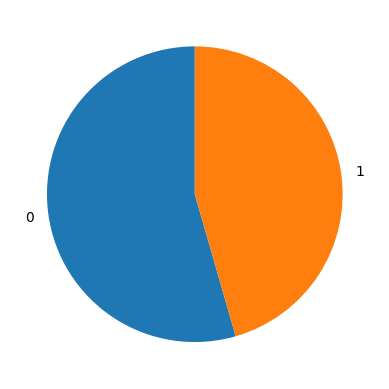

In [112]:
plt.pie(x = vis, labels = vis.index, startangle = 90)

<Axes: xlabel='label', ylabel='count'>

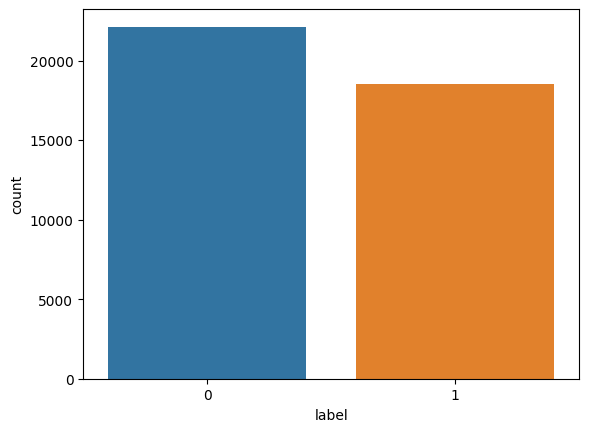

In [113]:
sns.countplot(x = 'label' , data = df)

In [130]:
x = df['text']
y = df['label']

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [132]:
vect = TfidfVectorizer(stop_words='english')

In [133]:
x = vect.fit_transform(x)

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [136]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [137]:
reg.fit(x_train,y_train)

LogisticRegression()

In [138]:
reg.score(x_test,y_test)

0.7292307692307692

In [139]:
y_pred = reg.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.7292307692307692

In [142]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [143]:
dt.fit(x_train,y_train)
y_pred2 = dt.predict(x_test)
score = accuracy_score(y_test, y_pred2)
score

0.6912

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [146]:
y_pred3 = rf.predict(x_test)
score = accuracy_score(y_test, y_pred3)
score

0.7064615384615385